In [1]:
#!pip install transformers
#!pip install gradio
#!pip install timm
#!pip install inflect
#!pip install phonemizer

In [2]:
from helper import load_image_from_url, render_results_in_image

In [3]:
from transformers import pipeline

In [4]:
from transformers.utils import logging
logging.set_verbosity_error()
from helper import ignore_warnings
ignore_warnings()

In [5]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

In [6]:
from PIL import Image

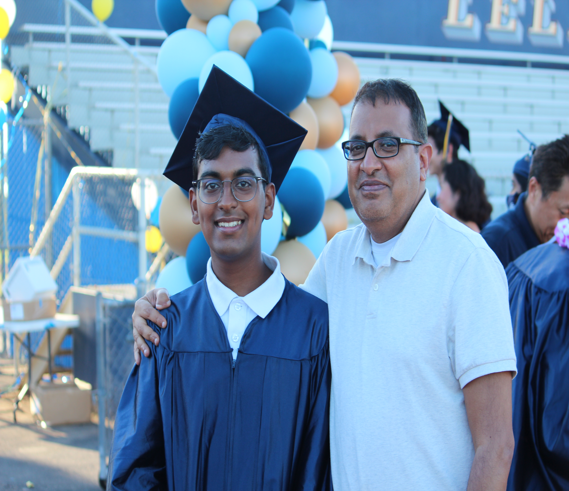

In [7]:
raw_image = Image.open('adi_grad.jpeg')
raw_image.resize((569, 491))

In [8]:
pipeline_output = od_pipe(raw_image)

In [9]:
processed_image = render_results_in_image(
    raw_image, 
    pipeline_output)

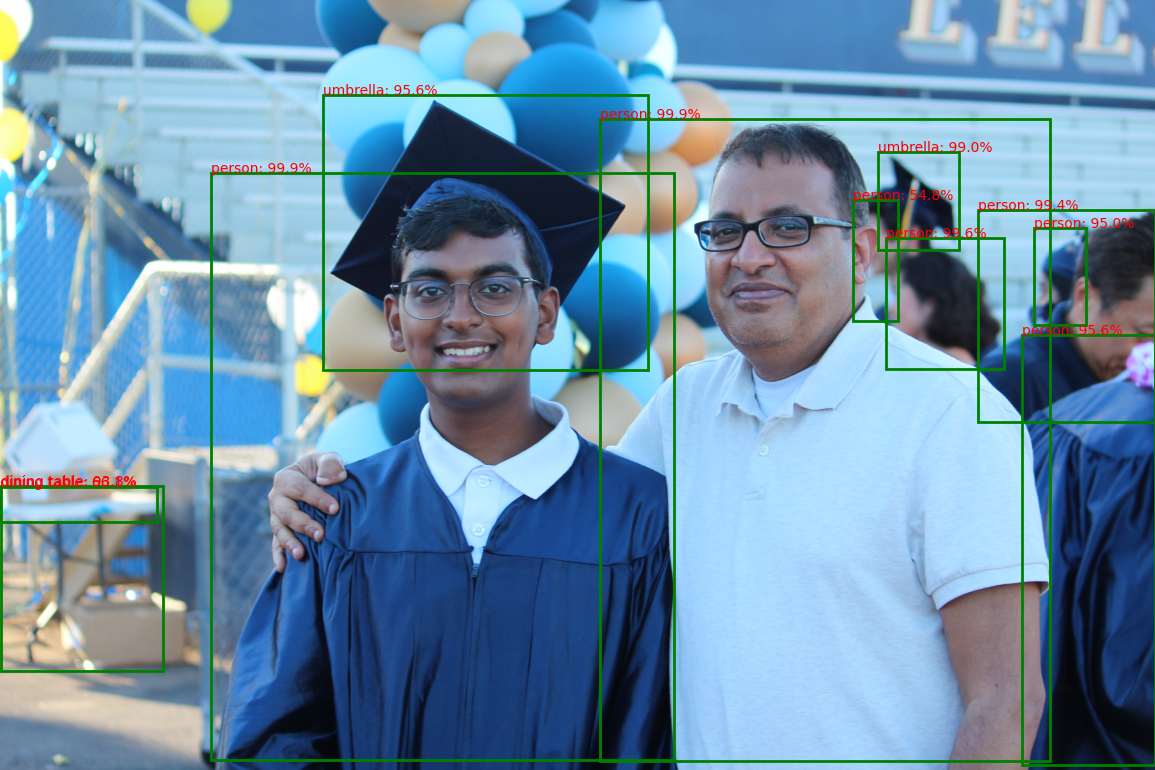

In [10]:
processed_image

In [11]:
import os
import gradio as gr

In [12]:
def get_pipeline_prediction(pil_image):
    
    pipeline_output = od_pipe(pil_image)
    
    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [13]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [14]:
demo.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


In [15]:
demo.close()

Closing server running on port: 7860


<h2>Make an AI Powered Audio Assistant</h2>
Combine the object detector with a text-to-speech model that will help dictate what is inside the image.

Inspect the output of the object detection pipeline.

In [16]:
pipeline_output

[{'score': 0.9942116141319275,
  'label': 'person',
  'box': {'xmin': 4391, 'ymin': 944, 'xmax': 5184, 'ymax': 1892}},
 {'score': 0.949618399143219,
  'label': 'person',
  'box': {'xmin': 4641, 'ymin': 1024, 'xmax': 4874, 'ymax': 1458}},
 {'score': 0.989935576915741,
  'label': 'umbrella',
  'box': {'xmin': 3941, 'ymin': 682, 'xmax': 4304, 'ymax': 1120}},
 {'score': 0.6608134508132935,
  'label': 'dining table',
  'box': {'xmin': 1, 'ymin': 2186, 'xmax': 705, 'ymax': 2344}},
 {'score': 0.5481410622596741,
  'label': 'person',
  'box': {'xmin': 3828, 'ymin': 897, 'xmax': 4028, 'ymax': 1441}},
 {'score': 0.9561214447021484,
  'label': 'umbrella',
  'box': {'xmin': 1447, 'ymin': 428, 'xmax': 2909, 'ymax': 1661}},
 {'score': 0.9994121789932251,
  'label': 'person',
  'box': {'xmin': 946, 'ymin': 778, 'xmax': 3026, 'ymax': 3410}},
 {'score': 0.9382978677749634,
  'label': 'dining table',
  'box': {'xmin': 2, 'ymin': 2180, 'xmax': 733, 'ymax': 3013}},
 {'score': 0.995770275592804,
  'label':

In [17]:
od_pipe

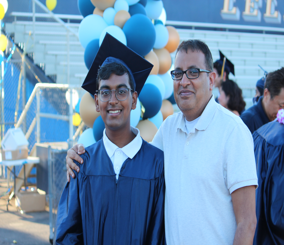

In [19]:
raw_image = Image.open('adi_grad.jpeg')
raw_image.resize((284, 245))

In [20]:
from helper import summarize_predictions_natural_language

In [21]:
text = summarize_predictions_natural_language(pipeline_output)

In [22]:
text

'In this image, there are seven persons two umbrellas and two dining tables.'

In [23]:
tts_pipe = pipeline("text-to-speech",
                    model="kakao-enterprise/vits-ljs")

In [24]:
narrated_text = tts_pipe(text)

RuntimeError: espeak not installed on your system

In [25]:
from IPython.display import Audio as IPythonAudio

In [26]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

NameError: name 'narrated_text' is not defined